In [76]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [78]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw
import icewave.field.multi_instruments as multi

In [79]:
import urllib

In [31]:
import urllib.request
import subprocess



for phone in phonelist:
    a = subprocess.run(['ping','-c','5',f'192.168.2.1{phone}'],text=True,stdout=True)
    print(a)


PING 192.168.2.133 (192.168.2.133): 56 data bytes
64 bytes from 192.168.2.133: icmp_seq=0 ttl=64 time=82.973 ms
64 bytes from 192.168.2.133: icmp_seq=1 ttl=64 time=27.036 ms
64 bytes from 192.168.2.133: icmp_seq=2 ttl=64 time=259.400 ms
64 bytes from 192.168.2.133: icmp_seq=3 ttl=64 time=56.633 ms
64 bytes from 192.168.2.133: icmp_seq=4 ttl=64 time=100.711 ms

--- 192.168.2.133 ping statistics ---
5 packets transmitted, 5 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 27.036/105.351/259.400/80.945 ms
CompletedProcess(args=['ping', '-c', '5', '192.168.2.133'], returncode=0)
PING 192.168.2.134 (192.168.2.134): 56 data bytes
64 bytes from 192.168.2.134: icmp_seq=0 ttl=64 time=303.060 ms
64 bytes from 192.168.2.134: icmp_seq=1 ttl=64 time=229.330 ms
64 bytes from 192.168.2.134: icmp_seq=2 ttl=64 time=104.426 ms
64 bytes from 192.168.2.134: icmp_seq=3 ttl=64 time=65.763 ms
64 bytes from 192.168.2.134: icmp_seq=4 ttl=64 time=285.385 ms

--- 192.168.2.134 ping statistics -

PING 192.168.2.149 (192.168.2.149): 56 data bytes
64 bytes from 192.168.2.149: icmp_seq=0 ttl=64 time=309.822 ms
64 bytes from 192.168.2.149: icmp_seq=1 ttl=64 time=209.112 ms
64 bytes from 192.168.2.149: icmp_seq=2 ttl=64 time=108.079 ms
64 bytes from 192.168.2.149: icmp_seq=3 ttl=64 time=27.786 ms
64 bytes from 192.168.2.149: icmp_seq=4 ttl=64 time=253.292 ms

--- 192.168.2.149 ping statistics ---
5 packets transmitted, 5 packets received, 0.0% packet loss
round-trip min/avg/max/stddev = 27.786/181.618/309.822/101.392 ms
CompletedProcess(args=['ping', '-c', '5', '192.168.2.149'], returncode=0)


In [37]:
len(phonelist)

15

In [35]:
# Poor-man sync. when the accelerometer (in x / directions) will pass the threshold, each phone will take that point in time as its origin
phonelist = [33,34,35,36,37,38,39,42,43,44,45,46,47,48,49]
for phone in phonelist:
    print(phone)
    urllib.request.urlopen(f"http://192.168.2.1{phone}:8080/init?threshold=0.5").read()

33
34
35
36
37
38
39
42
43
44
45
46
47
48
49


['-1', ' NaN', ' NaN', ' NaN', ' ']

In [36]:
port = 8080
name = 'experiment'
for phone in phonelist:
    print(phone)
    ip = f'192.168.2.1{phone}'
# Start recording. name is just for naming the files. Not mandatory
    urllib.request.urlopen(f"http://{ip}:{port}/start?name={name}").read()

33
34
35
36
37
38
39
42
43
44
45
46
47
48
49


In [40]:
port = 8080
name = 'experiment'
for phone in phonelist[12:]:
    print(phone)
    ip = f'192.168.2.1{phone}'
# Start recording. name is just for naming the files. Not mandatory
#    urllib.request.urlopen(f"http://{ip}:{port}/start?name={name}").read()
    urllib.request.urlopen(f"http://{ip}:{port}/stop").read()

47
48
49


In [42]:
# get the data
import subprocess

filelist = {}
for phone in phonelist:
    print(phone)
    ip = f'192.168.2.1{phone}'
    files = subprocess.run(['adb','-s',ip, 'shell','ls','storage/self/primary/Download/SensorDumper/*21_*accelero*.csv'],text=True,capture_output = True)#,stdout=True,stderr=True)
    lines = str(files).split("stdout='")[1].split('\\n')
    print(lines[:-1])
    filelist[phone]=lines[:-1]

#adb -s 192.168.2.133 push ~/Documents/Telephones/2024_Jules_Caso/app-release.apk /storage/self/primary/Download/app_JC_20112024.pak

33
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_51-android.sensor.accelerometer-3--1--1.csv']
34
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_52-android.sensor.accelerometer-4--1--1.csv']
35
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_54-android.sensor.accelerometer-2--1--1.csv']
36
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_56-android.sensor.accelerometer-2--1--1.csv']
37
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_57-android.sensor.accelerometer-2--1--1.csv']
38
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_58-android.sensor.accelerometer-2--1--1.csv', 'storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_58-android.sensor.accelerometer-2-73530737--1.csv']
39
['storage/self/primary/Download/SensorDumper/experiment-2024-11-22T21_06_58-android.sensor.accelerometer-2--1--1.csv']
42
['storage/self/prim

In [45]:
folder = "test_round_table/Run2/"
for phone in filelist.keys():
    print(phone)
    if phone==46:
        ip = f'192.168.2.1{phone}'
        for filename in filelist[phone]:
            #print(filename)
            savefile = folder+f"{phone}_"+filename.split('/')[-1]
            print(savefile)
            subprocess.run(['adb','-s',ip, 'pull',filename,savefile],text=True,stdout=True,)

33
34
35
36
37
38
39
42
43
44
45
46
test_round_table/Run2/46_', stderr='adb: device offline
adb: error: failed to stat remote object '', stderr='adb: device offline': No such file or directory
47
48
49


In [46]:
filelist = glob.glob(folder+'*.csv')

data = {}
for filename in filelist:
    phone = int(filename.split('/')[-1][:2])
    print(phone)
    d = rw_data.read_csv(filename)
    if phone in data.keys():
        data[phone]=data[phone]+d
    else:
        data[phone]=d

33
34
35
36
37
38
38
39
42
43
44
44
45
45
47
47
48
49


In [51]:
data[33][0]

['-1', ' NaN', ' NaN', ' NaN', ' ']

33
33 0.0
34
34 0.0
35
35 0.0
36
36 0.0
37
37 0.0
38
38 8303.7256606305
39
39 0.0
42
42 0.0
43
43 0.0
44
44 1673.1497131303
45
45 632.8303770079999
47
47 6281.1104444935
48
48 0.0
49
49 0.0


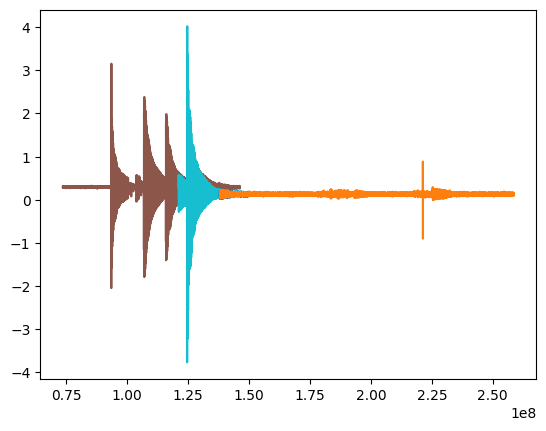

In [58]:

for phone in data.keys():
    print(phone)
    N = len(data[phone])
    a = np.zeros(N)
    t = np.zeros(N)
    for i in range(N):
        a[i] = data[phone][i][1]
        t[i] = data[phone][i][0]

    print(phone,np.nansum(a))
    plt.plot(t,a)
#plt.xlim([3.5*10**8,6*10**8])

In [68]:
phone = 44
N = len(data[phone])
print(N)
a = []
t = []
for i in range(N):
    if float(data[phone][i][0])>0:
        a.append(float(data[phone][i][1]))
        t.append(float(data[phone][i][0]))
print(len(t))
#plt.plot(t,a)

720000
11258


(0.0, 5000.0)

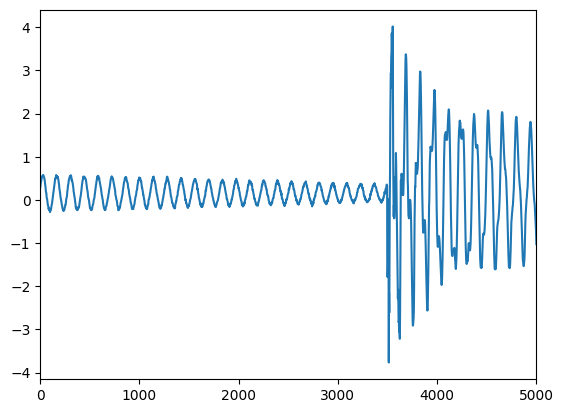

In [75]:
t = np.asarray(t)
a = np.asarray(a)
plt.plot((t-t[0])/1000,a)
plt.xlim([0,5*10**3])

In [ ]:
filelist = subprocess.run(['adb','devices'],text=True,stdout=True)

In [ ]:
name = 'experiment-2024-11-21T17_53_17-android.sensor.gyroscope-1-7082360130--1.csv'
savefile = "/Users/stephane/Documents/Telephones/2024_Jules_Caso/gyroscope.csv"
filelist = subprocess.run(['adb','-s',ip, 'pull',f"storage/self/primary/Download/SensorDumper/{name}",savefile],text=True,stdout=True,)

In [ ]:
import icewave.tools.rw_data as rw_data

filename = "/Users/stephane/Documents/Telephones/2024_Jules_Caso/gyroscope.csv"
data = rw_data.read_csv(filename)

In [ ]:
data = np.asarray(data)
plt.plot(data[:100,1].astype(float))

In [ ]:
a = plt.hist(np.diff(data[:10000,0].astype(int))/1000,100)
np.mean(np.diff(data[:10000,0].astype(int))/1000)

In [ ]:
np.mean(np.diff(np.asarray(data)[0,:10000].astype(int)))

In [ ]:
data = np.asarray(data)
data.shape

In [ ]:
data[0,:]

In [ ]:
t = data[:,0].astype(int)
acx = data[:,1].astype(float)
acy = data[:,2].astype(float)
acz = data[:,3].astype(float)

fig,ax = plt.subplots(figsize=(20,5))
ax.plot((t-t[0])/1000000,acz)
plt.xlim([0,1200])
g = 9.81
plt.ylim([-0.2+g,0.2+g])